In [4]:
# Step 1: Install Required Libraries
!pip install opencv-python pytesseract matplotlib

In [5]:
pip install pillow imageio[ffmpeg]


Note: you may need to restart the kernel to use updated packages.


In [6]:
image_path = r"C:\Users\vigne\Downloads\speedex-number-plates-and-speciality-coatings-nandanam-chennai-car-number-plate-manufacturers-ocru7o8q2i.avif"

In [7]:
import cv2
import imageio.v3 as iio
import os

def load_image(image_path):
    ext = os.path.splitext(image_path)[1].lower()
    if ext == '.avif':
        img = iio.imread(image_path)
        return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # imageio loads in RGB
    else:
        return cv2.imread(image_path)

def preprocess_image(image_path):
    img = load_image(image_path)
    if img is None:
        raise ValueError(f"Failed to load image from path: {image_path}")
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    filtered = cv2.bilateralFilter(gray, 11, 17, 17)
    edged = cv2.Canny(filtered, 30, 200)
    return img, edged


In [8]:
# Step 2: Import Libraries
import cv2
import pytesseract
# Set the path to tesseract executable (adjust if installed elsewhere)
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

import numpy as np
import matplotlib.pyplot as plt

In [9]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    filtered = cv2.bilateralFilter(gray, 11, 17, 17)
    edged = cv2.Canny(filtered, 30, 200)
    return img, edged


In [10]:
def extract_plate_region(img, edged):
    contours, _ = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:20]

    for c in contours:
        approx = cv2.approxPolyDP(c, 0.02 * cv2.arcLength(c, True), True)
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = w / float(h)
        area = cv2.contourArea(c)

        if len(approx) == 4 and 2 < aspect_ratio < 6 and area > 1000:
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            return img[y:y + h, x:x + w]
    
    return None


In [11]:
# Step 5: Recognize Characters using OCR
def recognize_plate_text(plate_img):
    if plate_img is None:
        return "Plate not detected."
    gray_plate = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray_plate, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    text = pytesseract.image_to_string(binary, config='--psm 8')
    return text.strip()

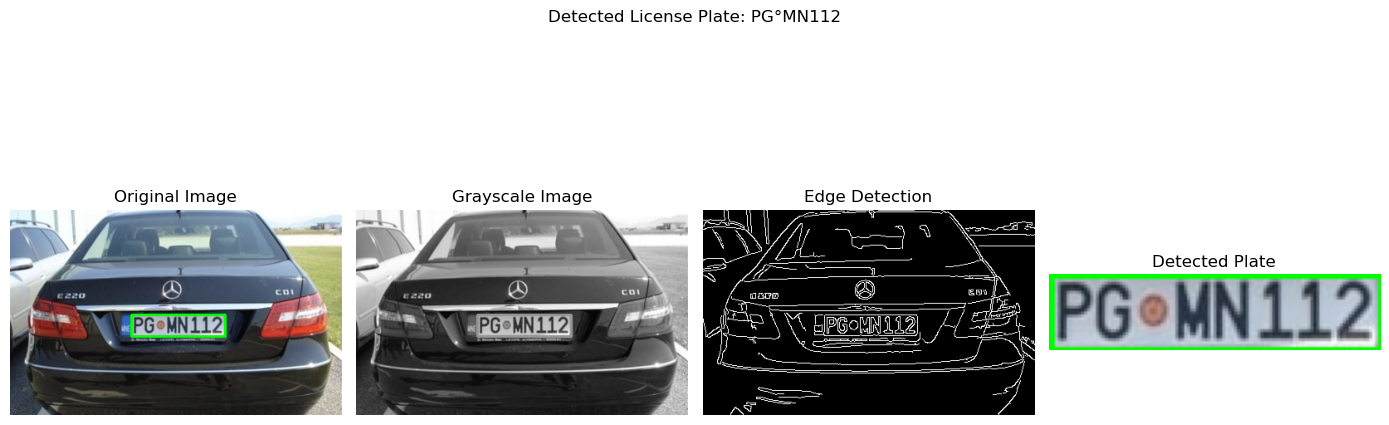

In [13]:
# Step 6: Run the Full System
# Replace with the path to your vehicle image
image_path = r"C:\Users\vigne\Downloads\png2jpg\Cars96.jpg"

img, edged = preprocess_image(image_path)
plate_img = extract_plate_region(img, edged)
text = recognize_plate_text(plate_img)

# Display Results
# Convert to grayscale for display
gray_full = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(14, 6))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(gray_full, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(edged, cmap='gray')
plt.title("Edge Detection")
plt.axis("off")

plt.subplot(1, 4, 4)
if plate_img is not None:
    plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
    plt.title("Detected Plate")
else:
    plt.text(0.5, 0.5, 'No Plate Detected', horizontalalignment='center', verticalalignment='center')
plt.axis("off")

plt.suptitle(f"Detected License Plate: {text}")
plt.tight_layout()
plt.show()


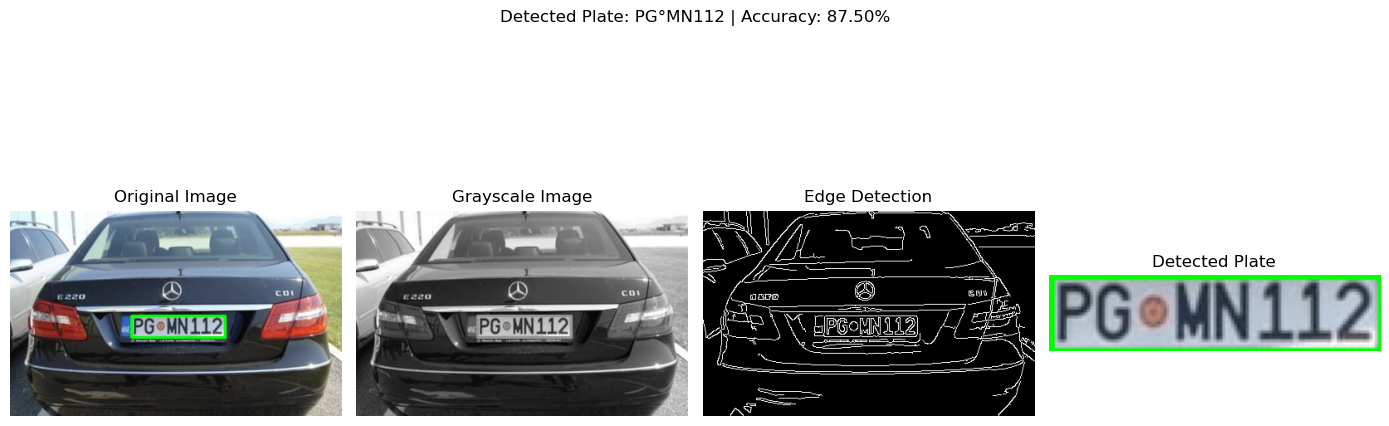

In [20]:
import cv2
import matplotlib.pyplot as plt

# Your functions: preprocess_image, extract_plate_region, recognize_plate_text
# (Assuming they are already defined above)

def calculate_accuracy(detected_plate, actual_plate):
    detected_plate = detected_plate.strip()
    actual_plate = actual_plate.strip()

    min_length = min(len(detected_plate), len(actual_plate))

    correct = 0
    for i in range(min_length):
        if detected_plate[i] == actual_plate[i]:
            correct += 1

    character_accuracy = (correct / len(actual_plate)) * 100

    plate_match = (detected_plate == actual_plate)

    return character_accuracy, plate_match


# Step 6: Run the Full System
# Replace with the path to your vehicle image
image_path = r"C:\Users\vigne\Downloads\png2jpg\Cars96.jpg"

img, edged = preprocess_image(image_path)
plate_img = extract_plate_region(img, edged)
text = recognize_plate_text(plate_img)

# Actual (Ground Truth) plate value (you set it manually for testing)
actual_plate = "PG MN112"   # <<== <<< PUT your ground truth here

# Calculate accuracy
char_accuracy, plate_match = calculate_accuracy(text, actual_plate)

# Display Results
# Convert to grayscale for display
gray_full = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(14, 6))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(gray_full, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(edged, cmap='gray')
plt.title("Edge Detection")
plt.axis("off")

plt.subplot(1, 4, 4)
if plate_img is not None:
    plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
    plt.title("Detected Plate")
else:
    plt.text(0.5, 0.5, 'No Plate Detected', horizontalalignment='center', verticalalignment='center')
plt.axis("off")

# Instead of only detected text, show accuracy too!
plt.suptitle(f"Detected Plate: {text} | Accuracy: {char_accuracy:.2f}%")
plt.tight_layout()
plt.show()


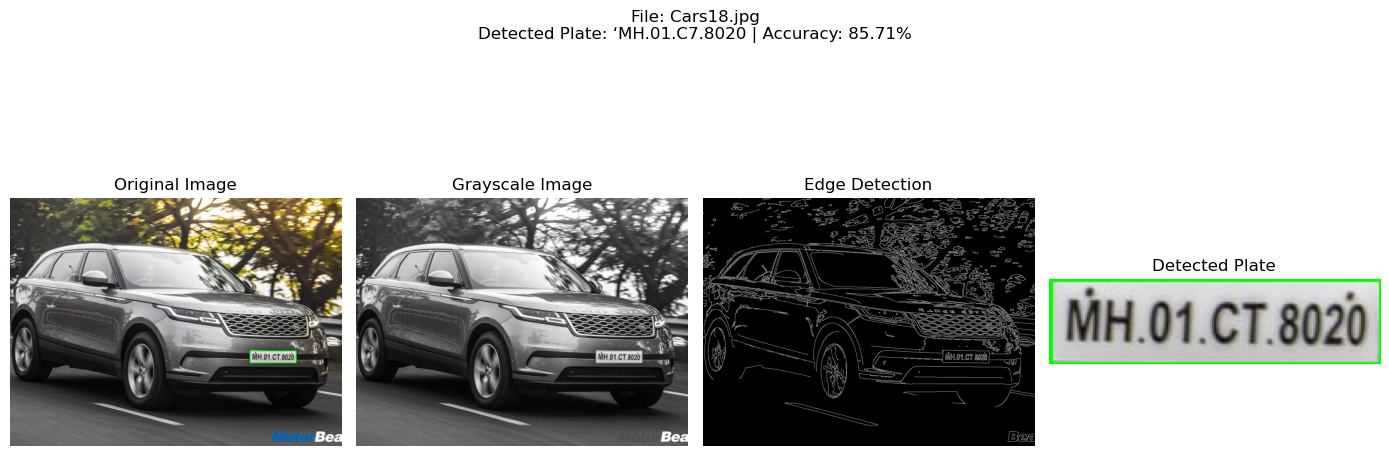

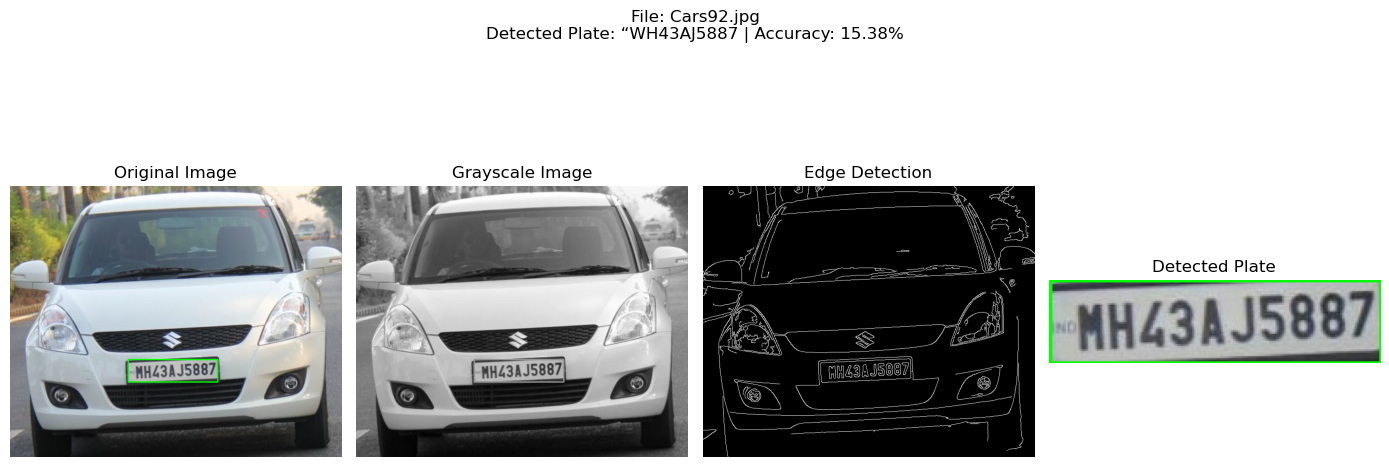

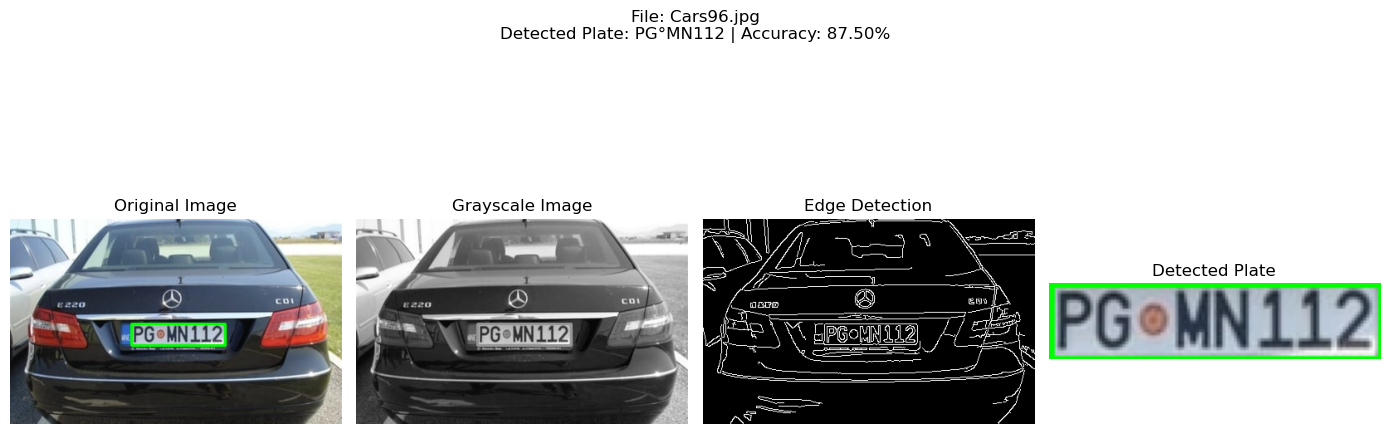

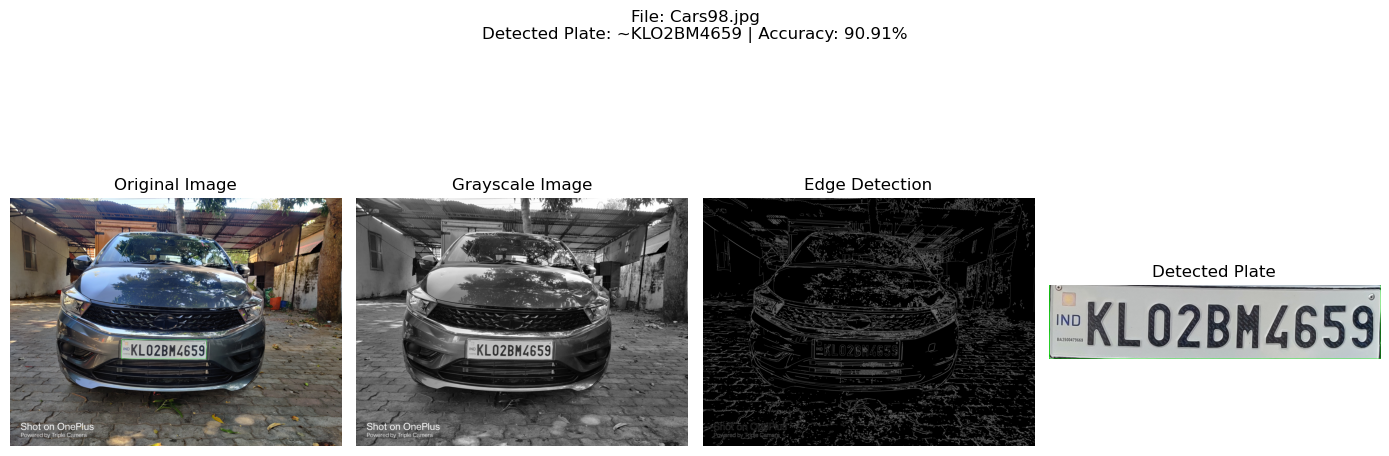

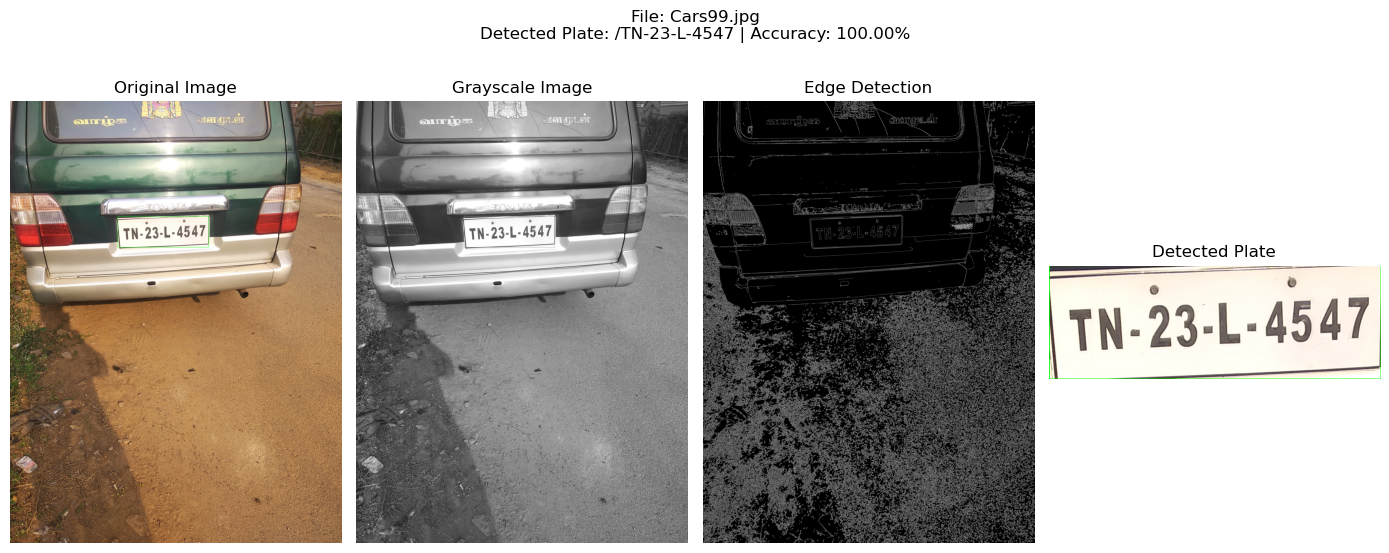

In [27]:
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd

# Your functions: preprocess_image, extract_plate_region, recognize_plate_text
# (Assuming they are already defined)

def calculate_accuracy(detected_plate, actual_plate):
    detected_plate = detected_plate.strip()
    actual_plate = actual_plate.strip()

    min_length = min(len(detected_plate), len(actual_plate))

    correct = 0
    for i in range(min_length):
        if detected_plate[i] == actual_plate[i]:
            correct += 1

    character_accuracy = (correct / len(actual_plate)) * 100
    return character_accuracy

# Set your folder path and ground truth CSV path
folder_path = r"C:\Users\vigne\Downloads\png2jpg"            # your images folder
csv_path = r"C:\Users\vigne\Downloads\ground_truths.csv"     # your ground truths file

# Read ground truths CSV
ground_truth_df = pd.read_csv(csv_path)
ground_truths = dict(zip(ground_truth_df.filename, ground_truth_df.plate))

# Process each image
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):   # Only images
        image_path = os.path.join(folder_path, filename)

        img, edged = preprocess_image(image_path)
        plate_img = extract_plate_region(img, edged)
        text = recognize_plate_text(plate_img)

        # Get ground truth
        actual_plate = ground_truths.get(filename, "")  # If not found, empty string

        if actual_plate:
            char_accuracy = calculate_accuracy(text, actual_plate)
        else:
            char_accuracy = 0

        # Display Results
        gray_full = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        plt.figure(figsize=(14, 6))

        plt.subplot(1, 4, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 4, 2)
        plt.imshow(gray_full, cmap='gray')
        plt.title("Grayscale Image")
        plt.axis("off")

        plt.subplot(1, 4, 3)
        plt.imshow(edged, cmap='gray')
        plt.title("Edge Detection")
        plt.axis("off")

        plt.subplot(1, 4, 4)
        if plate_img is not None:
            plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
            plt.title("Detected Plate")
        else:
            plt.text(0.5, 0.5, 'No Plate Detected', horizontalalignment='center', verticalalignment='center')
        plt.axis("off")

        plt.suptitle(f"File: {filename}\nDetected Plate: {text} | Accuracy: {char_accuracy:.2f}%", fontsize=12)
        plt.tight_layout()
        plt.show()
